In [ ]:
!python3 --version
!pip install --upgrade "git+https://github.com/lisphilar/covid19-sir.git#egg=covsirphy"
import covsirphy as cs
cs.__version__
!pip install openpyxl
from datetime import datetime
time_format = "%d%b%Y %H:%M"
datetime.now().strftime(time_format)
from collections import defaultdict
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import functools
from IPython.display import display, Markdown
import math
import os
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import ScalarFormatter
# %matplotlib inline
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import scipy as sci
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import sympy as sym

np.random.seed(123)
os.environ["PYTHONHASHSEED"] = "123"
plt.style.use("seaborn-ticks")
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["font.size"] = 11.0
plt.rcParams["figure.figsize"] = (9, 6)
# Pandas
pd.set_option("display.max_colwidth", 1000)

data_loader = cs.DataLoader(directory="kaggle/input")
jhu_data = data_loader.jhu()

covid_df = jhu_data.cleaned()
df = covid_df.pivot_table(
    index="Date", columns="Country", values="Confirmed", aggfunc="sum"
).fillna(method="ffill").fillna(0)
df = df.diff() / df.diff().shift(freq="D")
df = df.replace(np.inf, np.nan).fillna(1.0)
df = df.rolling(7).mean().dropna().loc[:covid_df["Date"].max(), :]
growth_value_df = df.round(2)
growth_value_df.tail()
df = growth_value_df.copy()
df = df.iloc[-7:, :].T
day_cols = df.columns.strftime("%d%b%Y")
df.columns = day_cols
last_date = day_cols[-1]
more_col, less_col = "GF > 1 [straight days]", "GF < 1 [straight days]"
df[more_col] = (growth_value_df > 1).iloc[::-1].cumprod().sum(axis=0)
df[less_col] = (growth_value_df < 1).iloc[::-1].cumprod().sum(axis=0)
df["Group"] = df[[more_col, less_col]].apply(
    lambda x: "Outbreaking" if x[0] >= 7 else "Stopping" if x[1] >= 7 else "Crossroad",
    axis=1
)
df = df.loc[:, ["Group", more_col, less_col, *day_cols]]
df = df.sort_values(["Group", more_col, less_col], ascending=False)
growth_df = df.copy()
growth_df.head()

Python 3.7.12
  Cloning https://github.com/lisphilar/covid19-sir.git to /tmp/pip-install-wpq5efgn/covsirphy_f0d79f123b224f9d9369e77d76e5765d
  Running command git clone -q https://github.com/lisphilar/covid19-sir.git /tmp/pip-install-wpq5efgn/covsirphy_f0d79f123b224f9d9369e77d76e5765d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 62 kB 693 kB/s 
     |████████████████████████████████| 1.0 MB 11.1 MB/s 
     |████████████████████████████████| 308 kB 52.8 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 167 kB 65.6 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 918 kB 32.1 MB/s 
     |████████████████████████████████| 2.0 MB 45.1 MB/s 
     |████████████████████████████████| 235 kB 52.2 MB/s 
     |████████████████████████████████| 6.3 MB 34.9 MB/s 
     |██████

Date,Group,GF > 1 [straight days],GF < 1 [straight days],24Nov2021,25Nov2021,26Nov2021,27Nov2021,28Nov2021,29Nov2021,30Nov2021
Country,,,,,,,,,,
Costa Rica,Stopping,0,364,0.79,0.72,0.74,0.74,0.74,0.74,0.83
Botswana,Stopping,0,332,0.71,0.71,0.71,0.71,0.71,0.71,0.71
Libya,Stopping,0,89,0.85,0.88,0.88,0.88,0.88,0.86,0.81
Bosnia and Herzegovina,Stopping,0,77,0.78,0.80,0.82,0.82,0.82,0.82,0.84
Ecuador,Stopping,0,77,0.59,0.59,0.59,0.59,0.74,0.74,0.73




---


# **Poland**

---



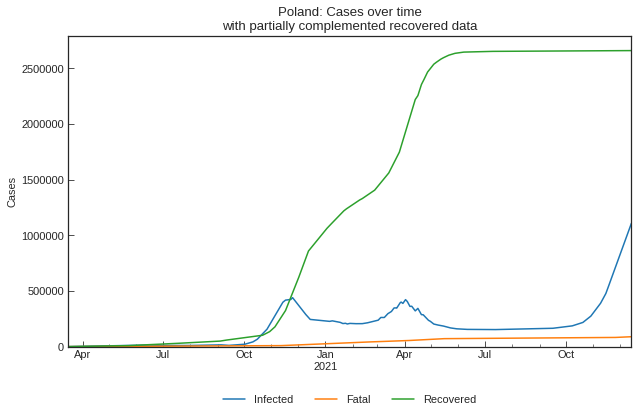

,Date,Infected,Fatal,Recovered
635,2021-12-10,1037956,87928,2659152
636,2021-12-11,1061185,88414,2659199
637,2021-12-12,1080523,88479,2659246
638,2021-12-13,1091824,88508,2659293
639,2021-12-14,1108700,89045,2659340


In [ ]:
pln_scenario = cs.Scenario(country = "Poland")
pln_scenario.register(jhu_data)
pln_scenario.records().tail()

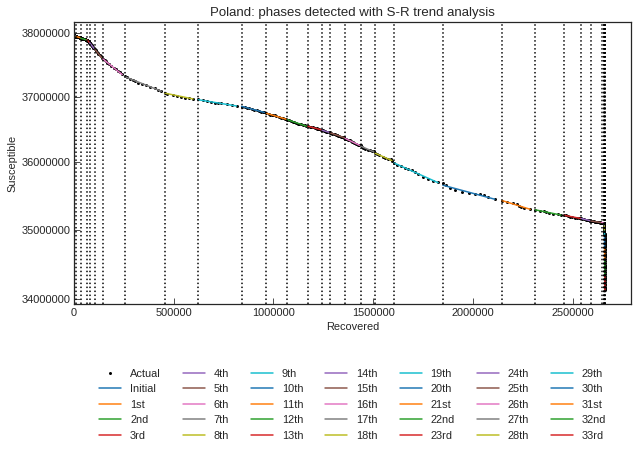

In [ ]:
#тренд та фази захворюваності в Польщі
_ = pln_scenario.trend()

In [ ]:
pln_scenario.summary()

,Type,Start,End,Population
0th,Past,15Mar2020,25May2020,37974750
1st,Past,26May2020,03Aug2020,37974750
2nd,Past,04Aug2020,22Sep2020,37974750
3rd,Past,23Sep2020,10Oct2020,37974750
4th,Past,11Oct2020,22Oct2020,37974750
5th,Past,23Oct2020,31Oct2020,37974750
6th,Past,01Nov2020,11Nov2020,37974750
7th,Past,12Nov2020,23Nov2020,37974750
8th,Past,24Nov2020,01Dec2020,37974750
9th,Past,02Dec2020,11Dec2020,37974750


In [ ]:
#визначимо параметри моделі для Польщі на кожній фазі захворваності
pln_scenario.estimate(cs.SIRF, timeout=120)


<SIR-F model: parameter estimation>
Running optimization with 2 CPUs...
	 5th phase (23Oct2020 - 31Oct2020): finished  364 trials in 0 min 12 sec
	 0th phase (15Mar2020 - 25May2020): finished  424 trials in 0 min 15 sec
	 6th phase (01Nov2020 - 11Nov2020): finished  176 trials in 0 min  5 sec
	 7th phase (12Nov2020 - 23Nov2020): finished  236 trials in 0 min  7 sec
	 1st phase (26May2020 - 03Aug2020): finished  339 trials in 0 min 11 sec
	 8th phase (24Nov2020 - 01Dec2020): finished  239 trials in 0 min  7 sec
	 2nd phase (04Aug2020 - 22Sep2020): finished  234 trials in 0 min  7 sec
	 9th phase (02Dec2020 - 11Dec2020): finished  361 trials in 0 min 12 sec
	 3rd phase (23Sep2020 - 10Oct2020): finished  339 trials in 0 min 11 sec
	10th phase (12Dec2020 - 22Dec2020): finished  182 trials in 0 min  5 sec
	 4th phase (11Oct2020 - 22Oct2020): finished  388 trials in 0 min 13 sec
	11th phase (23Dec2020 - 03Jan2021): finished  319 trials in 0 min 10 sec
	12th phase (04Jan2021 - 15Jan2021): fi

In [ ]:
#фази
pln_scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,15Mar2020,25May2020,37974750,SIR-F,3.72,0.000544,0.002345,0.038900,0.008102,480,0.001,142.0,8.0,41.0,0.857235,424.0,0 min 15 sec
1st,Past,26May2020,03Aug2020,37974750,SIR-F,0.96,0.000390,0.000400,0.021326,0.021835,480,0.000,832.0,15.0,15.0,0.267976,339.0,0 min 11 sec
2nd,Past,04Aug2020,22Sep2020,37974750,SIR-F,1.01,0.000102,0.000593,0.047366,0.046407,480,0.000,561.0,7.0,7.0,0.309966,234.0,0 min 7 sec
3rd,Past,23Sep2020,10Oct2020,37974750,SIR-F,1.83,0.000184,0.001748,0.076173,0.039814,480,0.000,190.0,4.0,8.0,0.384932,339.0,0 min 11 sec
4th,Past,11Oct2020,22Oct2020,37974750,SIR-F,2.98,0.000030,0.000752,0.095945,0.031419,480,0.000,443.0,3.0,10.0,0.478034,388.0,0 min 13 sec
5th,Past,23Oct2020,31Oct2020,37974750,SIR-F,2.92,0.000049,0.000937,0.082497,0.027339,480,0.000,355.0,4.0,12.0,0.366898,364.0,0 min 12 sec
6th,Past,01Nov2020,11Nov2020,37974750,SIR-F,2.25,0.001027,0.000784,0.067561,0.029150,480,0.001,425.0,4.0,11.0,0.389079,176.0,0 min 5 sec
7th,Past,12Nov2020,23Nov2020,37974750,SIR-F,1.15,0.000093,0.000483,0.049241,0.042187,480,0.000,690.0,6.0,7.0,0.263448,236.0,0 min 7 sec
8th,Past,24Nov2020,01Dec2020,37974750,SIR-F,0.82,0.000084,0.000538,0.034169,0.041071,480,0.000,619.0,9.0,8.0,0.117725,239.0,0 min 7 sec
9th,Past,02Dec2020,11Dec2020,37974750,SIR-F,0.75,0.000048,0.000599,0.039028,0.051389,480,0.000,556.0,8.0,6.0,0.113561,361.0,0 min 12 sec


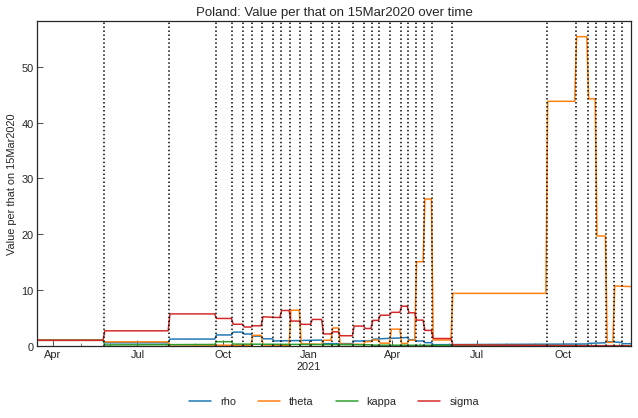

In [ ]:
_ = pln_scenario.history_rate()

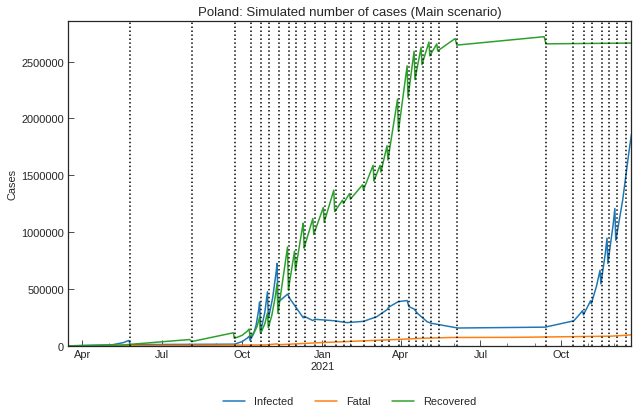

,Date,Infected,Fatal,Recovered
640,2021-12-15 00:00:00,1506089,93219,2661071
641,2021-12-16 00:00:00,1567272,93995,2661296
642,2021-12-17 00:00:00,1630818,94802,2661531
643,2021-12-18 00:00:00,1696806,95641,2661776
644,2021-12-19 00:00:00,1765320,96513,2662030
645,2021-12-20 00:00:00,1836446,97419,2662294
646,2021-12-21 00:00:00,1860749,97729,2662385


In [ ]:
#прогнозування на 7 днів
pln_scenario.clear()
pln_scenario.add(days=7)
pln_scenario.simulate().tail(7).style.background_gradient(axis=0)

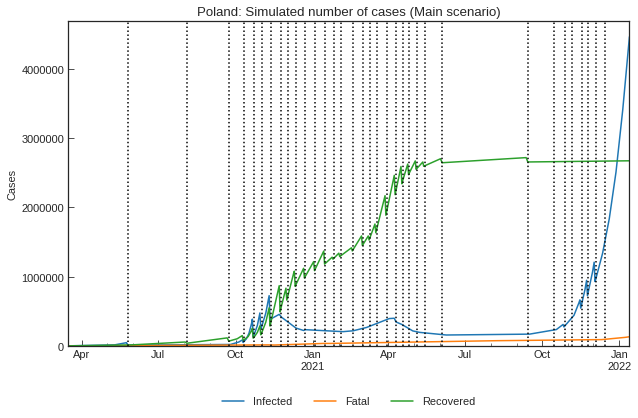

,Date,Infected,Fatal,Recovered
663,2022-01-07 00:00:00,3669786,121162,2669319
664,2022-01-08 00:00:00,3808682,122993,2669868
665,2022-01-09 00:00:00,3952149,124888,2670438
666,2022-01-10 00:00:00,4100286,126851,2671030
667,2022-01-11 00:00:00,4253193,128883,2671643
668,2022-01-12 00:00:00,4410968,130985,2672279
669,2022-01-13 00:00:00,4464659,131702,2672496


In [ ]:
#прогнозування показників на 30 днів
pln_scenario.clear()
pln_scenario.add(days=30)
pln_scenario.simulate().tail(7).style.background_gradient(axis=0)

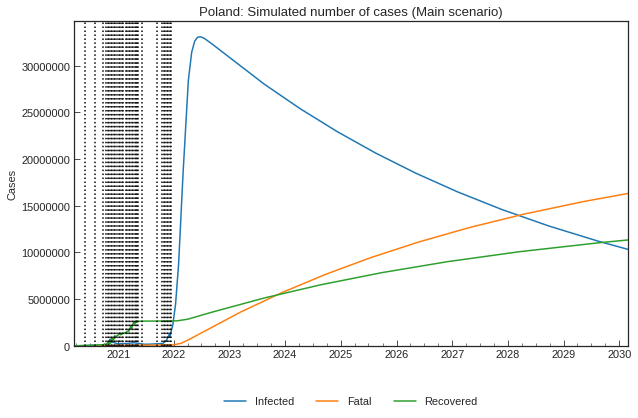

In [ ]:
#прогнозування показників на 300 днів
pln_scenario.clear()
pln_scenario.add(days=3000)
_ = pln_scenario.simulate()

In [ ]:
#прогнозування найближчого піку
pln_scenario.clear()
pln_scenario.add(days=1000)
df = pln_scenario.simulate(show_figure=False)
df.loc[df["Infected"].idxmax(), "Date"]

Timestamp('2022-06-19 00:00:00')

In [ ]:
#мінімум захворюваності
pln_scenario.clear()
pln_scenario.add(days=10000)
df = pln_scenario.simulate(show_figure=False)
df.loc[df["Infected"].idxmin(), "Date"]

Timestamp('2020-03-15 00:00:00')

---
# **Singapore**

---


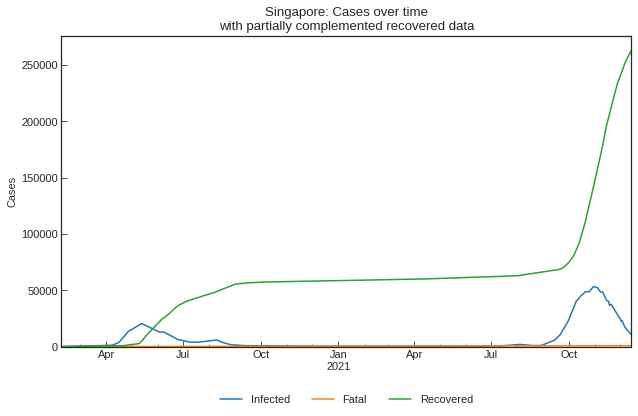

,Date,Infected,Fatal,Recovered
671,2021-12-10,13546,783,258104
672,2021-12-11,13012,789,259191
673,2021-12-12,11622,794,260946
674,2021-12-13,11221,798,261682
675,2021-12-14,10563,804,262776


In [ ]:
sgp_scenario = cs.Scenario(country="Singapore")
sgp_scenario.register(jhu_data)
sgp_scenario.records().tail()

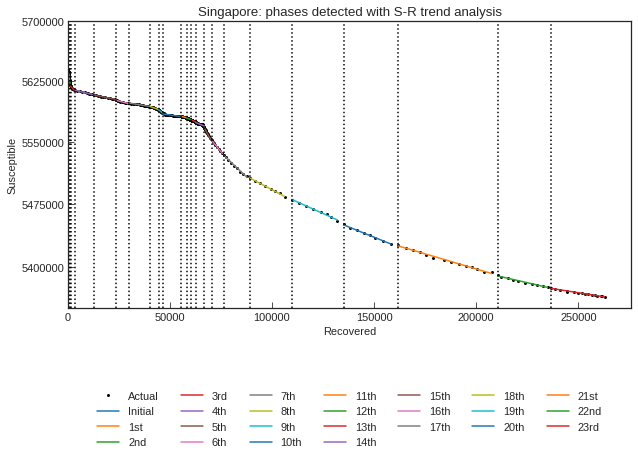

In [ ]:
_ = sgp_scenario.trend()

In [ ]:
sgp_scenario.summary()

,Type,Start,End,Population
0th,Past,08Feb2020,15Apr2020,5638676
1st,Past,16Apr2020,24Apr2020,5638676
2nd,Past,25Apr2020,03May2020,5638676
3rd,Past,04May2020,11May2020,5638676
4th,Past,12May2020,21May2020,5638676
5th,Past,22May2020,02Jun2020,5638676
6th,Past,03Jun2020,14Jun2020,5638676
7th,Past,15Jun2020,04Jul2020,5638676
8th,Past,05Jul2020,21Jul2020,5638676
9th,Past,22Jul2020,01Aug2020,5638676


In [ ]:
sgp_scenario.estimate(cs.SIRF, timeout=120)


<SIR-F model: parameter estimation>
Running optimization with 2 CPUs...
	 0th phase (08Feb2020 - 15Apr2020): finished  238 trials in 0 min 14 sec
	 3rd phase (04May2020 - 11May2020): finished  261 trials in 0 min 14 sec
	 4th phase (12May2020 - 21May2020): finished  173 trials in 0 min  5 sec
	 1st phase (16Apr2020 - 24Apr2020): finished  253 trials in 0 min  8 sec
	 5th phase (22May2020 - 02Jun2020): finished  174 trials in 0 min  4 sec
	 2nd phase (25Apr2020 - 03May2020): finished  417 trials in 0 min 13 sec
	 6th phase (03Jun2020 - 14Jun2020): finished  487 trials in 0 min 16 sec
	 7th phase (15Jun2020 - 04Jul2020): finished  131 trials in 0 min  3 sec
	 9th phase (22Jul2020 - 01Aug2020): finished  369 trials in 0 min 10 sec
	 8th phase (05Jul2020 - 21Jul2020): finished  240 trials in 0 min  6 sec
	10th phase (02Aug2020 - 29Aug2020): finished  271 trials in 0 min  7 sec
	12th phase (06Jan2021 - 30Apr2021): finished  234 trials in 0 min  6 sec
	11th phase (30Aug2020 - 05Jan2021): fi

In [ ]:
sgp_scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,08Feb2020,15Apr2020,5638676,SIR-F,2.38,0.000225,0.000316,0.088494,0.036827,1440,0,3163,11,27,0.472268,238.0,0 min 14 sec
1st,Past,16Apr2020,24Apr2020,5638676,SIR-F,25.38,0.000053,0.000069,0.135475,0.005269,1440,0,14437,7,189,0.068134,253.0,0 min 8 sec
2nd,Past,25Apr2020,03May2020,5638676,SIR-F,13.47,0.000148,0.000041,0.049429,0.003627,1440,0,24565,20,275,0.026709,417.0,0 min 13 sec
3rd,Past,04May2020,11May2020,5638676,SIR-F,3.24,0.000520,0.000005,0.031718,0.009768,1440,0.001,191035,31,102,0.059254,261.0,0 min 14 sec
4th,Past,12May2020,21May2020,5638676,SIR-F,0.76,0.000025,0.000006,0.037151,0.048751,1440,0,164476,26,20,0.031270,173.0,0 min 5 sec
5th,Past,22May2020,02Jun2020,5638676,SIR-F,0.50,0.000123,0.000000,0.027053,0.054561,1440,-,-,-,-,0.019913,174.0,0 min 4 sec
6th,Past,03Jun2020,14Jun2020,5638676,SIR-F,0.77,0.000191,0.000010,0.026579,0.034542,1440,0,104919,37,28,0.023710,487.0,0 min 16 sec
7th,Past,15Jun2020,04Jul2020,5638676,SIR-F,0.34,0.000087,0.000000,0.024148,0.070905,1440,-,-,-,-,0.036272,131.0,0 min 3 sec
8th,Past,05Jul2020,21Jul2020,5638676,SIR-F,0.82,0.000227,0.000000,0.057348,0.069590,1440,-,-,-,-,0.029396,240.0,0 min 6 sec
9th,Past,22Jul2020,01Aug2020,5638676,SIR-F,2.15,0.000009,0.000000,0.078514,0.036525,1440,-,-,-,-,0.015762,369.0,0 min 10 sec


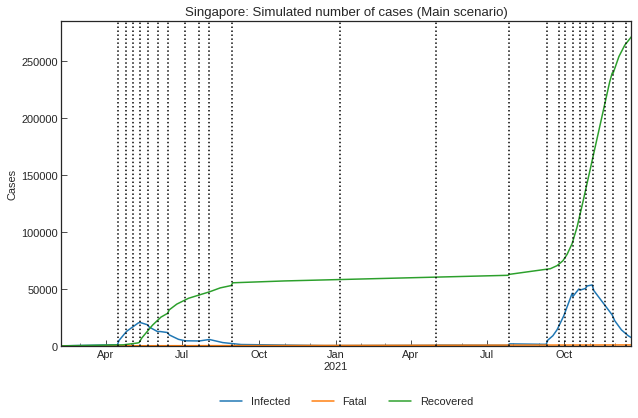

,Date,Infected,Fatal,Recovered
676,2021-12-15 00:00:00,10029,814,266221
677,2021-12-16 00:00:00,9478,817,267230
678,2021-12-17 00:00:00,8958,821,268184
679,2021-12-18 00:00:00,8466,824,269086
680,2021-12-19 00:00:00,8001,827,269938
681,2021-12-20 00:00:00,7562,830,270743
682,2021-12-21 00:00:00,7146,832,271504


In [ ]:
sgp_scenario.clear()
sgp_scenario.add(days=7)
sgp_scenario.simulate().tail(7).style.background_gradient(axis=0)

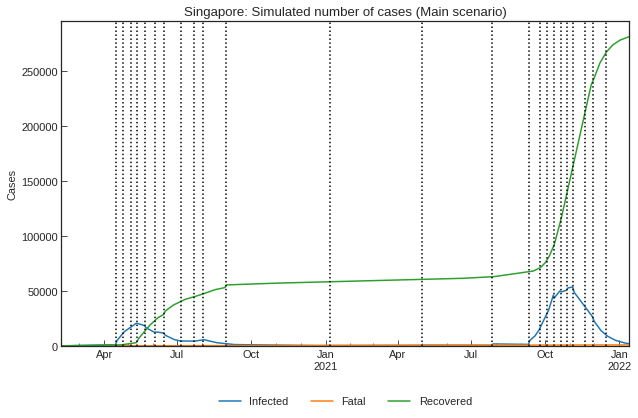

,Date,Infected,Fatal,Recovered
699,2022-01-07 00:00:00,2740,860,279576
700,2022-01-08 00:00:00,2590,861,279852
701,2022-01-09 00:00:00,2447,862,280112
702,2022-01-10 00:00:00,2313,863,280359
703,2022-01-11 00:00:00,2186,864,280591
704,2022-01-12 00:00:00,2066,865,280811
705,2022-01-13 00:00:00,1952,866,281019


In [ ]:
sgp_scenario.clear()
sgp_scenario.add(days=30)
sgp_scenario.simulate().tail(7).style.background_gradient(axis=0)

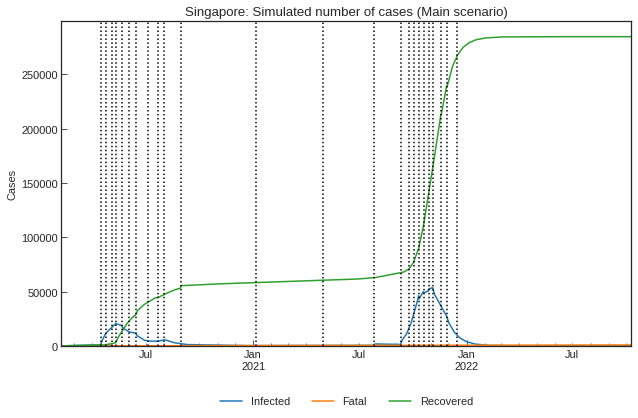

,Date,Infected,Fatal,Recovered
969,2022-10-04 00:00:00,0,878,284594
970,2022-10-05 00:00:00,0,878,284594
971,2022-10-06 00:00:00,0,878,284594
972,2022-10-07 00:00:00,0,878,284594
973,2022-10-08 00:00:00,0,878,284594
974,2022-10-09 00:00:00,0,878,284594
975,2022-10-10 00:00:00,0,878,284594


In [ ]:
sgp_scenario.clear()
sgp_scenario.add(days=300)
sgp_scenario.simulate().tail(7).style.background_gradient(axis=0)

In [ ]:
sgp_scenario.clear()
sgp_scenario.add(days=1000)
df = sgp_scenario.simulate(show_figure=False)
df.loc[df["Infected"].idxmin(), "Date"]

Timestamp('2022-06-09 00:00:00')

In [ ]:
sgp_scenario.clear()
sgp_scenario.add(days=1000)
df = sgp_scenario.simulate(show_figure=False)
df.loc[df["Infected"].idxmax(), "Date"]

Timestamp('2021-11-04 00:00:00')